In [ ]:
!pip -q install hvplot

In [ ]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_market_data = scaler.fit_transform(df_market_data)

In [7]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_market_data, columns=df_market_data.columns)

# Copy the crypto names from the original data
ind = df_market_data.index

# Set the coinid column as index
df_scaled = df_scaled.set_index(ind)

# Display sample data
df_scaled.sample(5)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
stellar,-0.277543,-0.385209,-0.153243,-0.371816,-0.656403,-0.353387,-0.270874
dash,-0.296940,0.094763,0.040040,-0.358830,-0.558527,-0.535732,-0.284071
cdai,0.180851,-0.704931,-0.001816,-0.143237,0.016060,-0.551146,-0.282310
monero,0.262723,1.792602,2.202665,1.437842,0.893865,-0.155893,-0.167644


---

### Find the Best Value for k Using the Original Data.

In [8]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [9]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    model = KMeans(k, random_state=25)
    model.fit(df_scaled)
    inertia.append(model.inertia_)

c:\Users\dean_\miniconda3-312\envs\plinky\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dean_\miniconda3-312\envs\plinky\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dean_\miniconda3-312\envs\plinky\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dean_\miniconda3-312\envs\plinky\Lib\site-packages\sklearn\cluster\_kmeans.p

In [10]:
# Create a dictionary with the data to plot the Elbow curve
df_elbow = {'inertia': inertia, 'k': k_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(df_elbow)

<Axes: xlabel='k'>

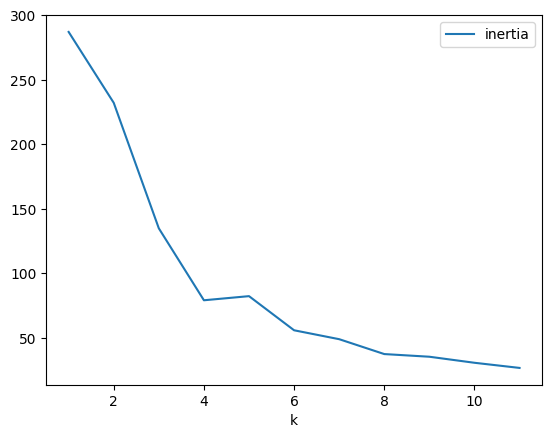

In [11]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot = df_elbow.plot(x='k', y='inertia')
elbow_plot

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 5

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [12]:
# Initialize the K-Means model using the best value for k
model = KMeans(5, random_state=25)

In [13]:
# Fit the K-Means model using the scaled data
model.fit(df_scaled)

c:\Users\dean_\miniconda3-312\envs\plinky\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=25)

In [14]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predictions = model.predict(df_scaled)

# Print the resulting array of cluster values.
print(predictions)

[1 1 3 3 1 1 1 1 1 3 3 3 3 1 3 1 3 3 1 3 3 1 3 3 3 3 3 3 1 4 3 3 2 1 3 0 4
 3 3 3 3]


In [15]:
# Create a copy of the DataFrame
df_market_data_copy = df_market_data.copy()

In [16]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_copy['cluster'] = predictions

# Display sample data
df_market_data_copy.sample(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195,1
huobi-token,-0.40818,1.61798,0.45488,-3.25488,-3.40689,42.23704,24.57164,3
ethlend,-13.52786,4.21266,-9.80075,-29.99499,2.13917,2227.92782,7852.08970,2
neo,0.49302,2.44243,-9.84803,-21.95472,13.51879,158.64773,131.29655,3
true-usd,-0.06197,0.16642,0.10974,0.03090,0.25154,-0.08874,0.40617,3


In [17]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_market_data_copy.hvplot(x='price_change_percentage_24h', y='price_change_percentage_7d', kind='scatter', by='cluster', hover_cols=['coin_id'])

:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [18]:
# Create a PCA model instance and set `n_components=3`.
model = PCA(3)

In [19]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
x_pca = model.fit_transform(df_scaled)
# View the first five rows of the DataFrame. 
x_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [20]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
model.explained_variance_

array([2.6689967 , 2.48978331, 1.26307212])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 6.42

In [21]:
# Create a new DataFrame with the PCA data.
df_pca = pd.DataFrame(x_pca, columns=[f"PC{i}" for i in range(1, 4)])
# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data
ind = df_market_data.index

# Set the coinid column as index
df_pca = df_pca.set_index(ind)

# Display sample data
df_pca.sample(5)

,PC1,PC2,PC3
coin_id,,,
huobi-token,-0.407483,-0.212507,-0.351426
tezos,-0.796176,-0.494409,1.082812
ripple,-0.471835,-0.222660,-0.479053
chainlink,-0.450711,0.517699,2.846143
dash,-0.613923,-0.479337,0.339565


---

### Find the Best Value for k Using the PCA Data

In [22]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [23]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    model = KMeans(k, random_state=25)
    model.fit(df_pca)
    inertia.append(model.inertia_)

c:\Users\dean_\miniconda3-312\envs\plinky\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dean_\miniconda3-312\envs\plinky\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dean_\miniconda3-312\envs\plinky\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dean_\miniconda3-312\envs\plinky\Lib\site-packages\sklearn\cluster\_kmeans.p

In [24]:
# Create a dictionary with the data to plot the Elbow curve
df_elbow_pca = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(df_elbow_pca)

<Axes: xlabel='k'>

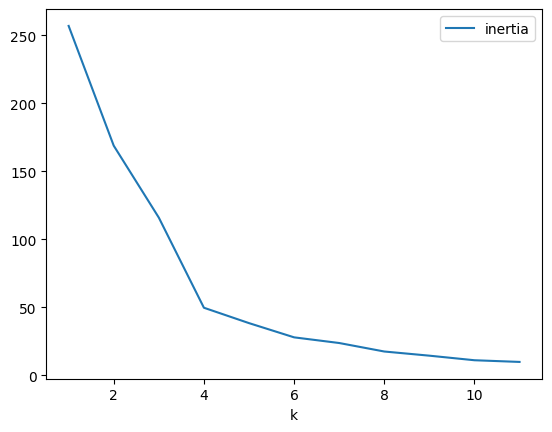

In [25]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot_pca = df_elbow_pca.plot(x='k', y='inertia')
elbow_plot_pca

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [26]:
# Initialize the K-Means model using the best value for k
model = KMeans(4)

In [27]:
# Fit the K-Means model using the PCA data
model.fit(df_pca)

c:\Users\dean_\miniconda3-312\envs\plinky\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [28]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predictions = model.predict(df_pca)
# Print the resulting array of cluster values.
print(predictions)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 3 1 0 1 2
 0 1 1 0]


In [29]:
# Create a copy of the DataFrame with the PCA data
df_pca_copy = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_copy['cluster'] = predictions

# Display sample data
df_pca_copy.sample(5)

,PC1,PC2,PC3,cluster
coin_id,,,,
monero,0.060499,2.909404,1.498571,1
ethereum-classic,-0.579924,-0.356334,-0.114942,1
iota,-0.764665,-0.517886,0.204990,1
ethlend,8.089018,-3.896891,2.301382,3
leo-token,-0.413296,-0.674115,-1.076628,0


In [30]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_pca_copy.hvplot(x='PC1', y='PC2', kind='scatter', by='cluster', hover_cols=['coin_id'])

:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [31]:
# Composite plot to contrast the Elbow curves


df = df_elbow.set_index('k').join(df_elbow_pca.set_index('k'), lsuffix='-no-pca', rsuffix='-pca')
df.hvplot.scatter(x='k', y=['inertia-no-pca', 'inertia-pca'], value_label='inertia', marker=['o', '+'])

:NdOverlay   [Variable]
   :Scatter   [k]   (inertia)

In [32]:
# Composite plot to contrast the clusters

# select only the used columns
market_cols = ['cluster', 'price_change_percentage_24h', 'price_change_percentage_7d']
pca_cols = ['cluster']

# join for simplicity
df = df_market_data_copy[market_cols].join(df_pca_copy[pca_cols], lsuffix='-no-pca', rsuffix='-pca')

# plot
ax1 = df.hvplot.scatter(x='price_change_percentage_24h', y='price_change_percentage_7d', by='cluster-no-pca', marker='o', width=500, height=250)
ax2 = df.hvplot.scatter(x='price_change_percentage_24h', y='price_change_percentage_7d', by='cluster-pca', marker='+', width=500, height=250)
ax1 + ax2

:Layout
   .NdOverlay.I  :NdOverlay   [cluster-no-pca]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)
   .NdOverlay.II :NdOverlay   [cluster-pca]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Less intermingling between the non-singleton clusters